The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


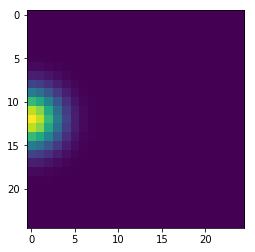

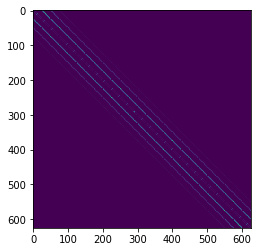

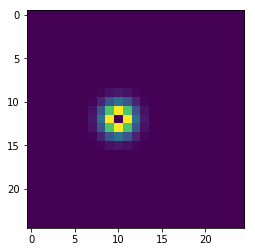

ValueError: probabilities are not non-negative

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from htmresearch.support.gridcells.grids_from_pca.utils import (gaussian_encoder,
                                                                create_random_walk_from_transition_fct,
                                                                transition_from_matrix,
                                                                create_transition_matrix)
from scipy.special import expit as sigmoid
%matplotlib inline

%load_ext autoreload
%autoreload 2



n_ = 25
n  = n_**2

wrap = False

T      = create_transition_matrix(n_, wrap, sigma=3.0, with_diagonal=False)
tr_fct = transition_from_matrix(T)
enc    = gaussian_encoder((n_,n_), wrap, sigma = 10.)

plt.imshow(enc(300).reshape((n_,n_)))
plt.show()
plt.imshow(T)
plt.show()
plt.imshow(T[310].reshape((n_,n_)))
plt.show()



X = create_random_walk_from_transition_fct(tr_fct, enc, n, 100000)
mean = np.mean(X, axis=0, keepdims=True)
print np.amin(mean), np.amax(mean)
X = X - mean


# plt.imshow(mean.reshape((n_,n_)))
# plt.show()

# mean2 = np.mean(X, axis=0, keepdims=True)
# print np.amin(mean2), np.amax(mean2)
# plt.imshow(mean2.reshape((n_,n_)))
# plt.show()

G = np.dot(X.T,X)

lam, vec = np.linalg.eigh(G)
sorted_indices = np.argsort(lam)[::-1]
lam = lam[sorted_indices]
vec = vec[:, sorted_indices].T
print vec.shape
plt.plot(lam)
plt.show()

img = np.concatenate( [vec[i].reshape((n_,n_)) for i in range(0,20)], axis = 1)


plt.figure(figsize=(20,5))
plt.imshow(img)

(625, 625)


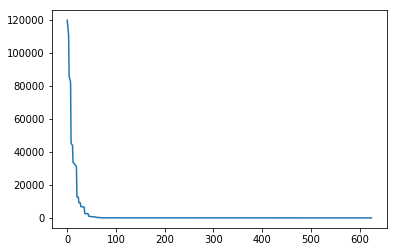

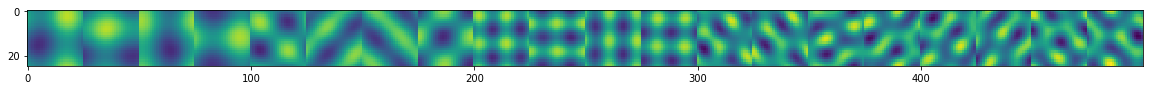

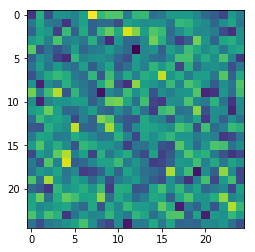

0
1
2
3
4


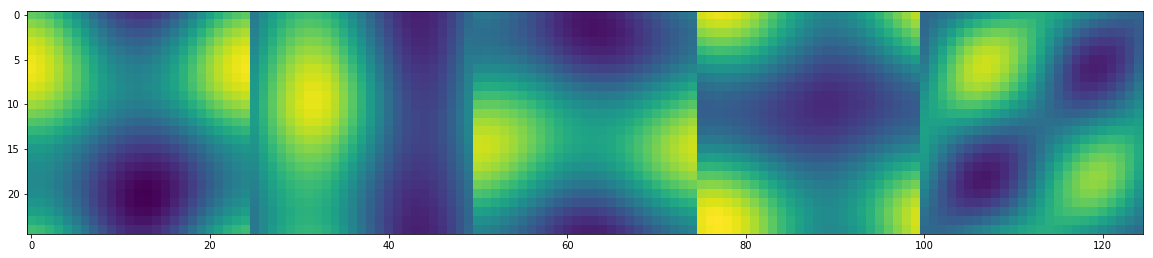

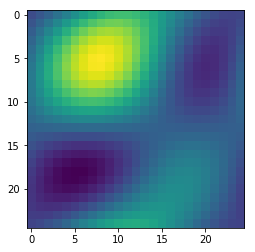

In [63]:
from htmresearch.support.gridcells.grids_from_pca.utils import (oja_w1, oja)

G = np.dot(X.T,X)
W = np.random.randn(5,n)

i = 0
plt.imshow(W[i].reshape((n_,n_)))
plt.show()

for epoch in range(5):
    print epoch
    perm = np.random.permutation(len(X))
    oja(W, (X[perm])[:10000], 0.01, False)


    
img = np.concatenate( [W[i].reshape((n_,n_)) for i in range(W.shape[0])], axis = 1)

plt.figure(figsize=(20,10))
plt.imshow(img)
plt.show()

plt.imshow(np.dot(G,W[i].T).reshape(n_,n_))
plt.show()


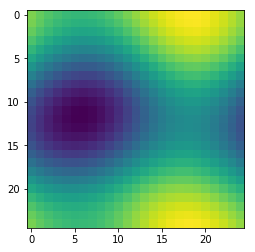

(625, 625)


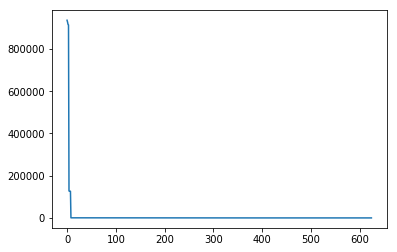

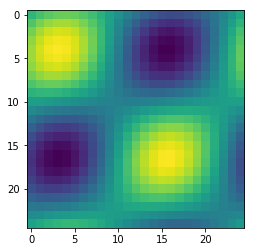

In [34]:


G = np.dot(X.T,X)

lam, vec = np.linalg.eigh(G)
sorted_indices = np.argsort(lam)[::-1]
lam = lam[sorted_indices]
vec = vec[:, sorted_indices].T
print vec.shape
plt.plot(lam)
plt.show()

plt.imshow(vec[6].reshape((n_,n_)))

In [43]:
m = np.ones((7,5))

y = np.array([1,2,0,0,0]).reshape((1,5))

m*y


array([[ 1.,  2.,  0.,  0.,  0.],
       [ 1.,  2.,  0.,  0.,  0.],
       [ 1.,  2.,  0.,  0.,  0.],
       [ 1.,  2.,  0.,  0.,  0.],
       [ 1.,  2.,  0.,  0.,  0.],
       [ 1.,  2.,  0.,  0.,  0.],
       [ 1.,  2.,  0.,  0.,  0.]])